# Project - Breast Cancer Prediction

## 1. Data Preprocessing

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tabulate import tabulate

import warnings

from sklearn.exceptions import ConvergenceWarning

np.random.seed(23)

# Suppress warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis

In [2]:
# Reading the Data File

columns = ["Sample code number", "Clump Thickness",
          "Uniformity of Cell Size", "Uniformity of Cell Shape",
          "Marginal Adhesion", "Single Epithelial Cell Size",
          "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli",
          "Mitoses", "Class"]



df = pd.read_csv("breast-cancer-wisconsin.csv", names=columns)

df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Dropping 'Sample Code Number' due to irrelvance in prediction of Breast Cancer

data = df.drop(['Sample code number'], axis=1)

In [4]:
# Reassigning Values for Target Class

data['Class'] = data['Class'].replace({2: 0, 4: 1})  
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [5]:
data.shape

(699, 10)

In [6]:
# Checking for 'NULL' values

data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [7]:
# Checking for Duplicated Instances

data.duplicated().sum()

236

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [9]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [10]:
# Bare Nuclei tab is missing

In [11]:
data.value_counts('Bare Nuclei')

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [12]:
data["Bare Nuclei"] = data["Bare Nuclei"].apply(lambda x: 0 if x == '?' else int(x))

In [13]:
data.value_counts('Bare Nuclei')

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: count, dtype: int64

In [14]:
data.drop(data[(data['Bare Nuclei'] == 0)].index, inplace=True)

In [15]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


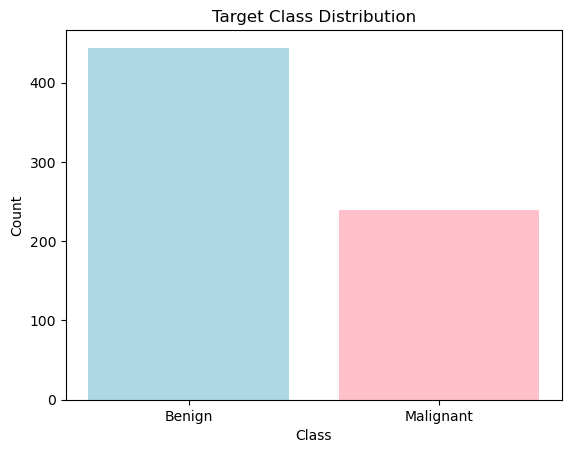

In [39]:
# Determining Target Class Variable Distribution

class_counts = data['Class'].value_counts()

# Extract counts for class 0 and class 1
benign = class_counts.get(0, 0)
malignant = class_counts.get(1, 0)


plt.bar(['Benign', 'Malignant'], [benign, malignant], color=['lightblue', 'pink'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

### Feature Selection

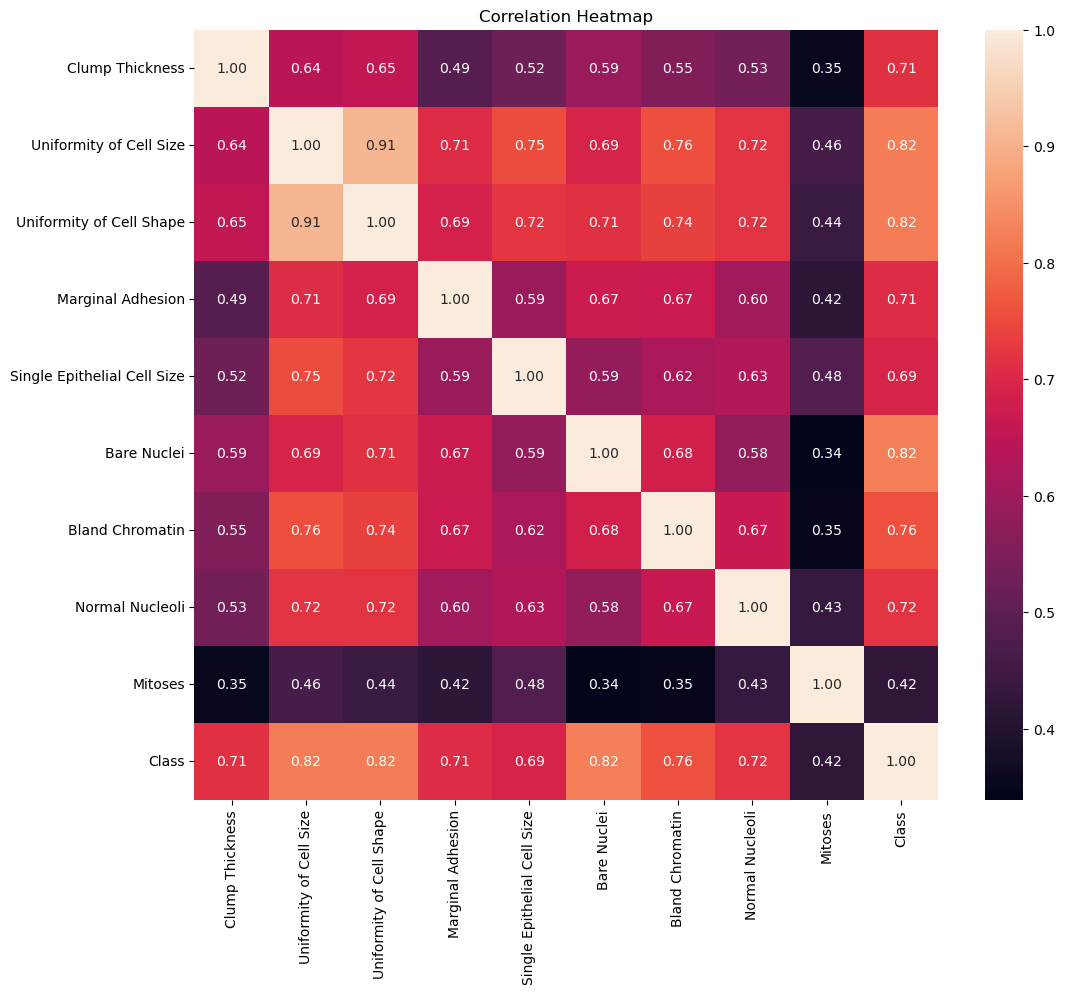

In [17]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Determining 

target_corr = corr_matrix['Class'].drop('Class') # Drop the target variable itself

# Sort the correlations in descending order

target_corr = target_corr.abs().sort_values(ascending=False)

# Display the sorted correlations

print("Correlation of features with the target variable (price): \n\n", target_corr)

Correlation of features with the target variable (price): 

 Bare Nuclei                    0.822696
Uniformity of Cell Shape       0.821891
Uniformity of Cell Size        0.820801
Bland Chromatin                0.758228
Normal Nucleoli                0.718677
Clump Thickness                0.714790
Marginal Adhesion              0.706294
Single Epithelial Cell Size    0.690958
Mitoses                        0.423448
Name: Class, dtype: float64


In [19]:
# Mitoses column could be dropped

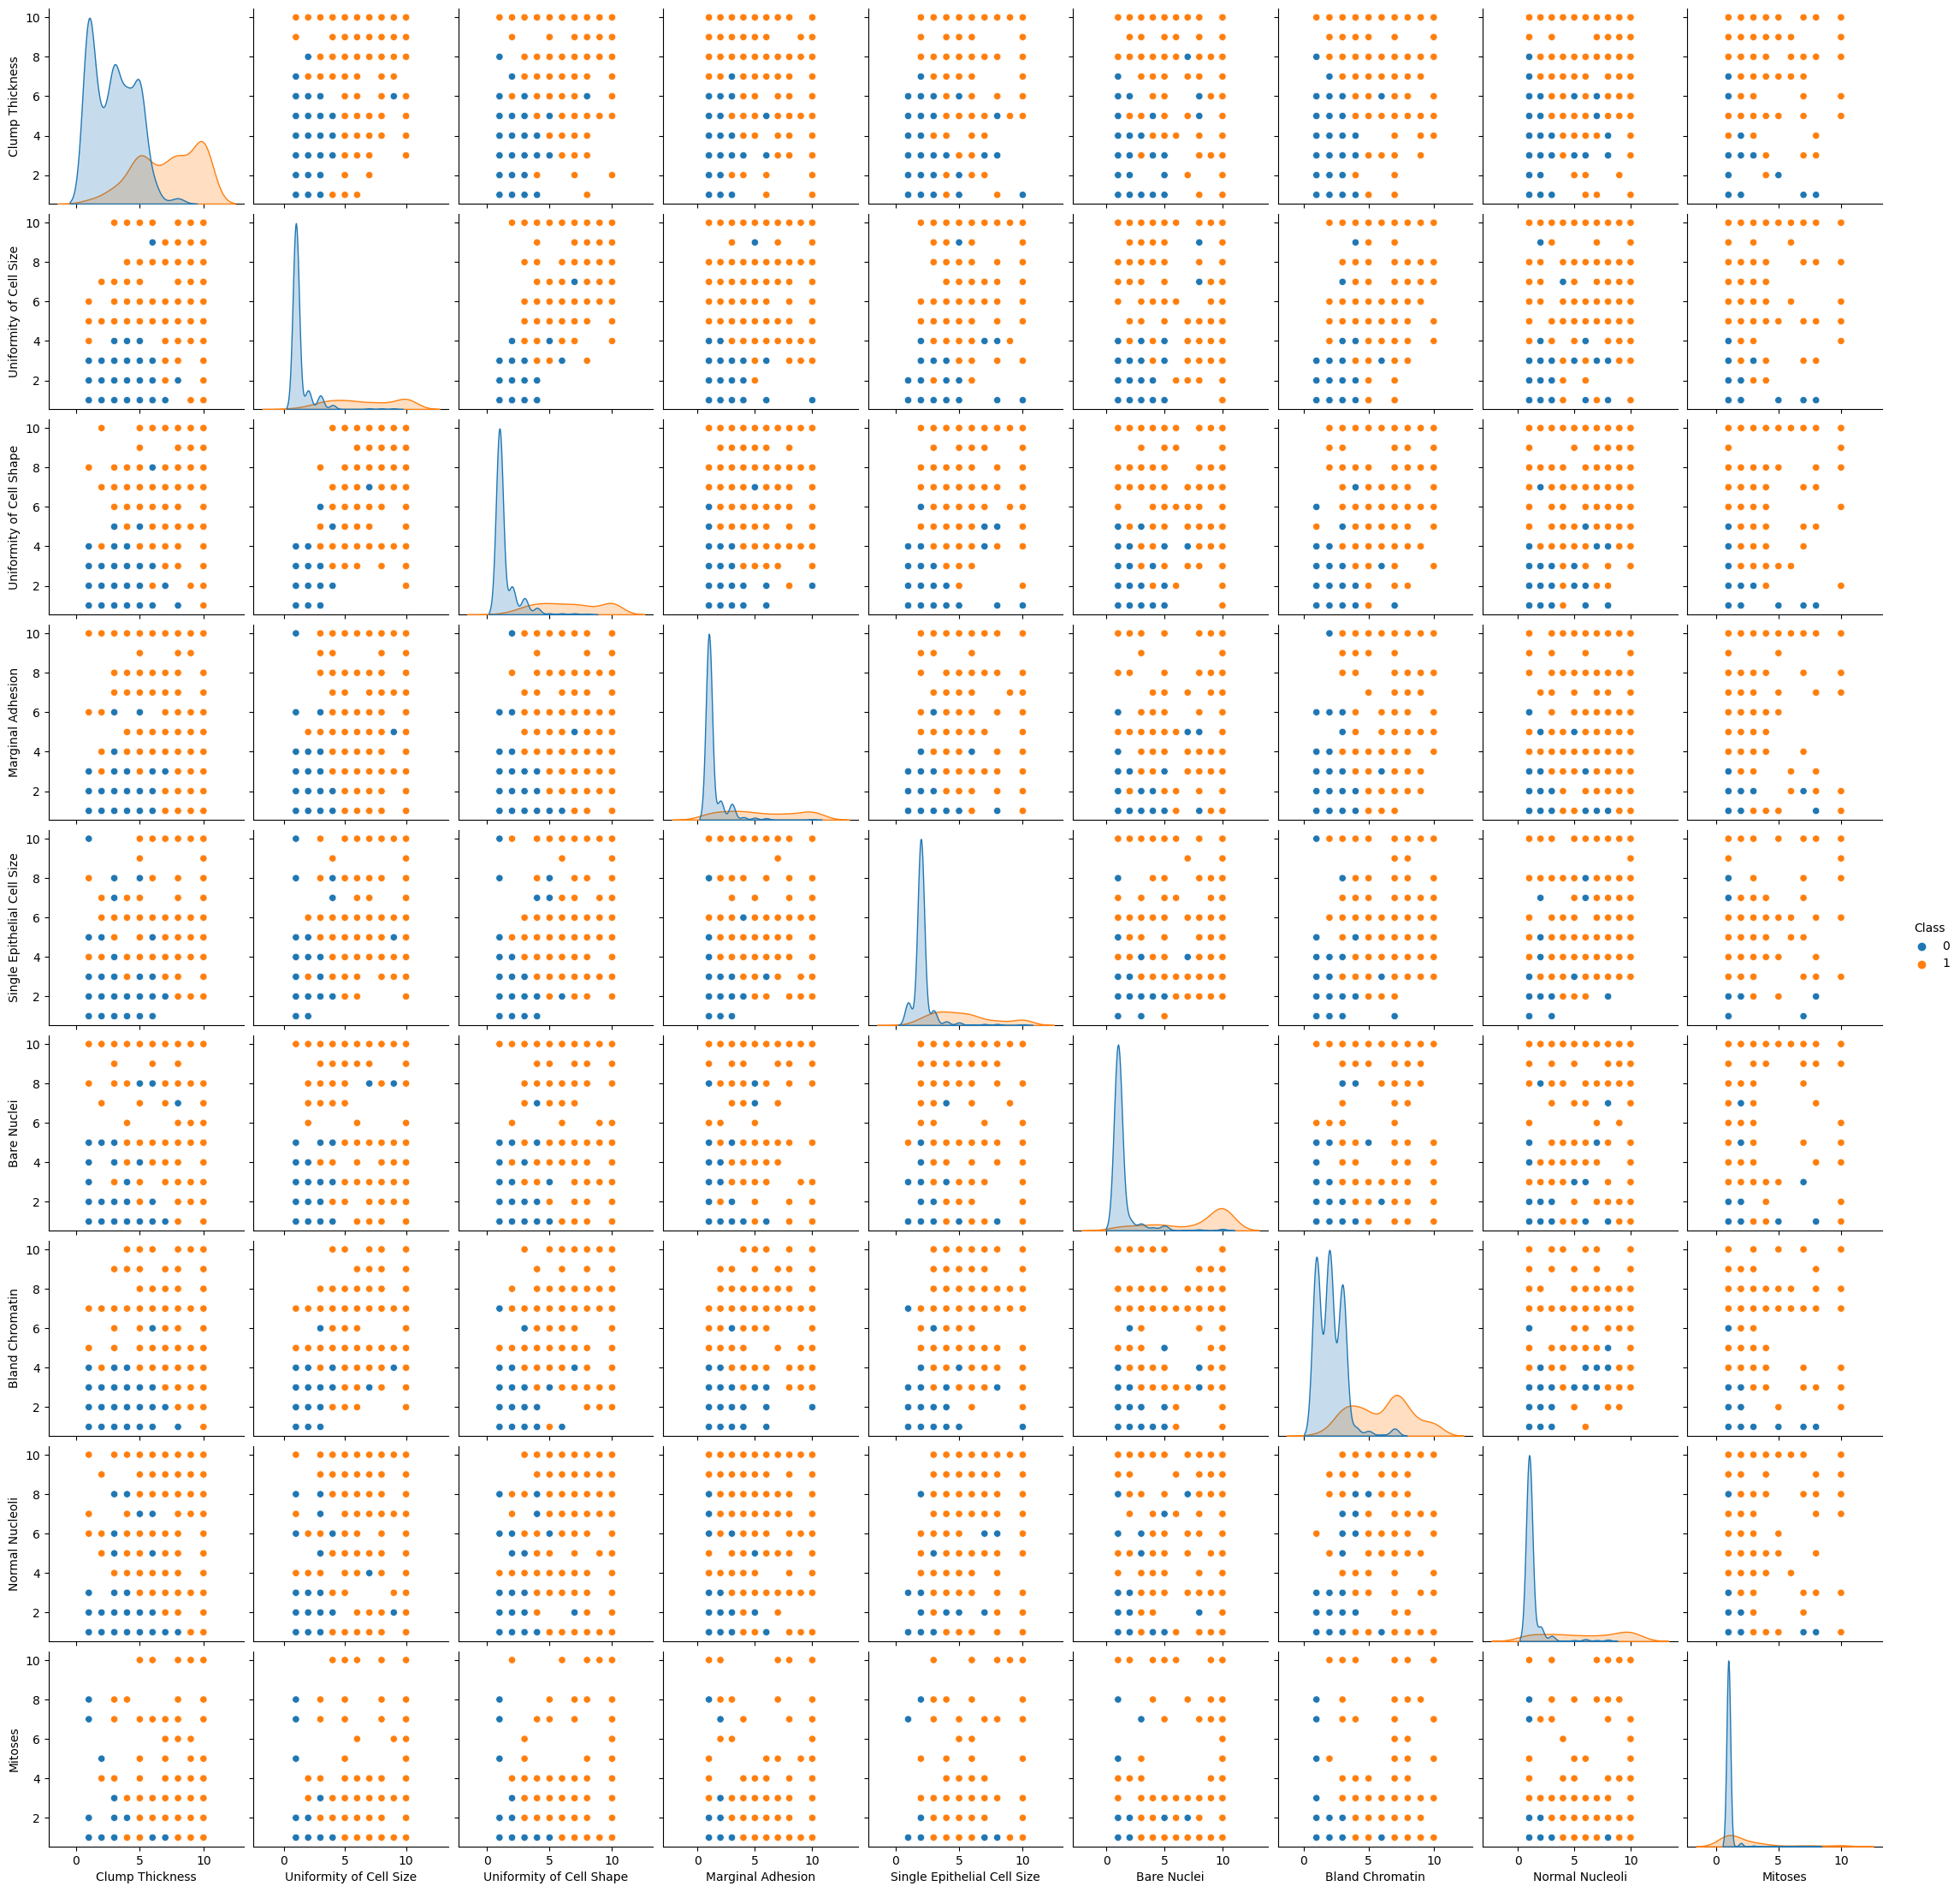

In [20]:
sns.pairplot(data, vars=columns[1:-1], hue=columns[-1])
plt.show()

# 2. Classification Models Implementation

In [21]:
# Fuction to Plot Confusion Matix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()


### Baseline Evaluation

In [22]:
# Splitting the Dataset into 'Test' & 'Train' Data

X = data.drop(['Class', 'Mitoses'], axis=1)
y = data['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# KNN Classifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

knn_pred = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)

print("KNN Accuracy:", knn_accuracy)
print('\n')
print('Classification Report:\n')
print(knn_report)

KNN Accuracy: 0.9562043795620438


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [42]:
# Logistic Regression Classifier

lr_classifier = LogisticRegression(max_iter=10000)
lr_classifier.fit(X_train, y_train)

lr_pred = lr_classifier.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_accuracy)
print('\n')
print('Classification Report:\n')
print(lr_report)

Logistic Regression Accuracy: 0.9562043795620438


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [45]:
# Random Forest Classifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_pred = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)
print('\n')
print('Classification Report:\n')
print(rf_report)

Random Forest Accuracy: 0.9635036496350365


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        79
           1       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



In [54]:
# Neural Network Classifier

nn_classifier = MLPClassifier()
nn_classifier.fit(X_train, y_train)

nn_pred = nn_classifier.predict(X_test)

nn_accuracy = accuracy_score(y_test, nn_pred)
nn_report = classification_report(y_test, nn_pred)

print("Neural Network Accuracy:", nn_accuracy)
print('\n')
print('Classification Report:\n')
print(nn_report)

Neural Network Accuracy: 0.9416058394160584


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        79
           1       0.98      0.88      0.93        58

    accuracy                           0.94       137
   macro avg       0.95      0.93      0.94       137
weighted avg       0.94      0.94      0.94       137



### Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for each classifier
knn_param_grid = {'n_neighbors': list(range(1, 11))}

# GridSearchCV for each classifier
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=10, scoring='accuracy')

knn_grid_search.fit(X_train, y_train)

knn_results = pd.DataFrame(knn_grid_search.cv_results_)
knn_results[['param_n_neighbors', 'mean_test_score']]

,param_n_neighbors,mean_test_score
0,1,0.957845
1,2,0.941414
2,3,0.961515
3,4,0.959764
4,5,0.967071
5,6,0.963434
6,7,0.968889
7,8,0.965185
8,9,0.967037
9,10,0.963367


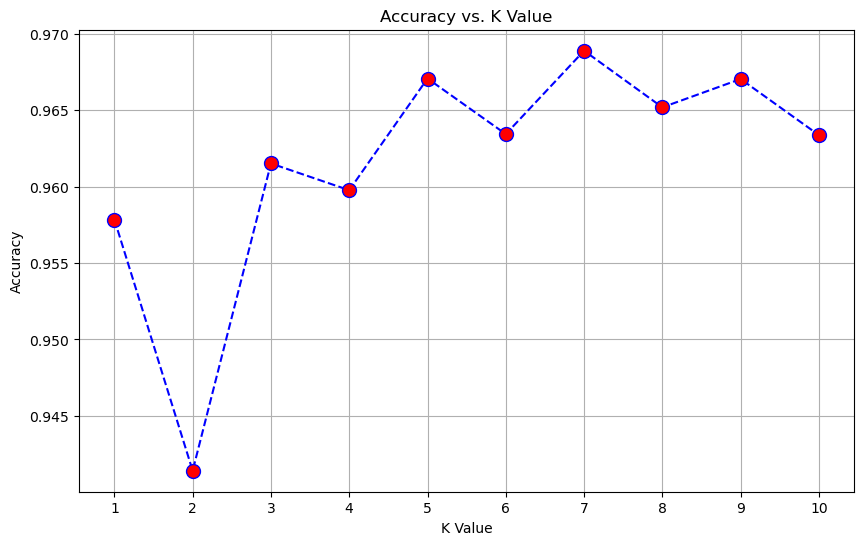

In [28]:
# Plotting

plt.figure(figsize=(10, 6))
plt.plot(knn_results['param_n_neighbors'], knn_results['mean_test_score'], color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [29]:
# Fit the grid search objects
knn_grid_search.fit(X_train, y_train)


# Best hyperparameters and corresponding accuracy for each classifier
print("KNN Best Params:", knn_grid_search.best_params_)
print("KNN Best Accuracy:", knn_grid_search.best_score_)

KNN Best Params: {'n_neighbors': 7}
KNN Best Accuracy: 0.968888888888889


In [30]:
# Logistic Regression Hyperparameter Tuning

lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}


lr_grid_search = GridSearchCV(LogisticRegression(max_iter=10000), lr_param_grid, cv=10, scoring='accuracy')


lr_grid_search.fit(X_train, y_train)

lr_results = pd.DataFrame(lr_grid_search.cv_results_)
lr_results[['param_C', 'mean_test_score']]

,param_C,mean_test_score
0,0.001,0.965219
1,0.01,0.967071
2,0.1,0.967071
3,1,0.967071
4,10,0.967071


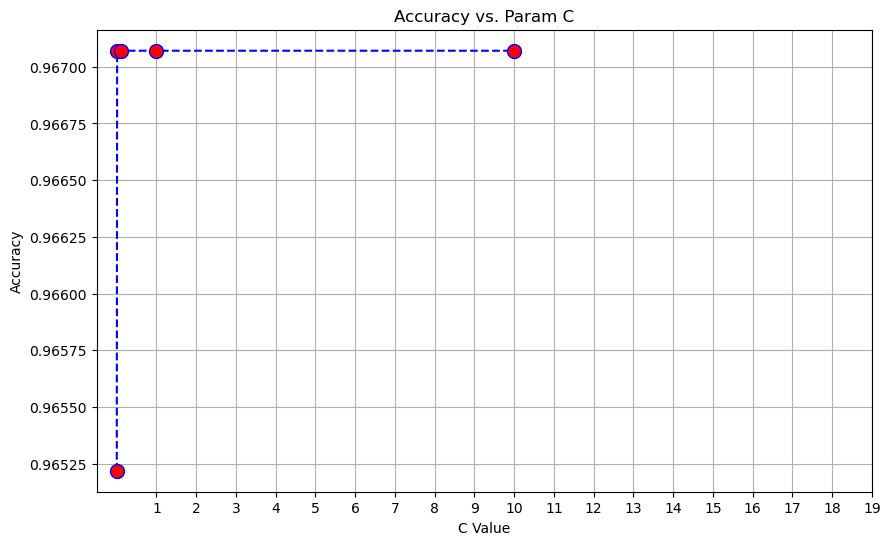

In [31]:
# Plotting

plt.figure(figsize=(10, 6))
plt.plot(lr_results['param_C'], lr_results['mean_test_score'], color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. Param C')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [32]:
# Best hyperparameters and corresponding accuracy for each classifier
print("Best Parameters:", lr_grid_search.best_params_)
print("Best Accuracy:", lr_grid_search.best_score_)

Best Parameters: {'C': 0.01}
Best Accuracy: 0.9670707070707071


In [33]:
# Random Forests Hyperparameter Tuning

rf_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(1, 51))}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=10, scoring='accuracy')


rf_grid_search.fit(X_train, y_train)


rf_results = pd.DataFrame(rf_grid_search.cv_results_)
rf_results [['param_criterion', 'param_max_depth', 'mean_test_score']]

,param_criterion,param_max_depth,mean_test_score
0,gini,1,0.957845
1,gini,2,0.965219
2,gini,3,0.968889
3,gini,4,0.965185
4,gini,5,0.963367
...,...,...,...
95,entropy,46,0.967071
96,entropy,47,0.967037
97,entropy,48,0.967071
98,entropy,49,0.967071


<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

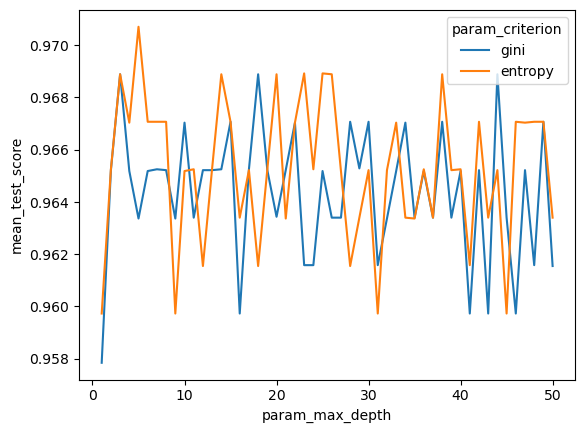

In [34]:
sns.lineplot(x = 'param_max_depth', y = 'mean_test_score', hue='param_criterion', data = rf_results)

In [35]:
# Best hyperparameters and corresponding accuracy for each classifier
print("Best Parameters:", rf_grid_search.best_params_)
print("Best Accuracy:", rf_grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5}
Best Accuracy: 0.9707070707070706


In [36]:
# Neural Network Hyperparameter Tuning

nn_param_grid = {'activation':('logistic', 'tanh', 'relu'), 'learning_rate_init':[0.0001, 0.001, 0.003, 0.01, 0.03, 1], 'hidden_layer_sizes': [50, 100, 200, 300]}

nn_grid_search = GridSearchCV(MLPClassifier(max_iter=500), nn_param_grid, cv=5, scoring='accuracy')

nn_grid_search.fit(X_train, y_train)


nn_results = pd.DataFrame(rf_grid_search.cv_results_)
nn_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039015,0.002411,0.002822,0.000115,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.981818,1.000000,0.981818,0.909091,0.927273,0.963636,0.962963,0.962963,0.944444,0.944444,0.957845,0.025852,100
1,0.038553,0.000516,0.002774,0.000141,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.963636,1.000000,0.981818,0.927273,0.945455,0.963636,0.962963,0.981481,0.944444,0.981481,0.965219,0.020704,55
2,0.039896,0.002294,0.002806,0.000267,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.963636,1.000000,1.000000,0.927273,0.945455,0.963636,0.981481,0.981481,0.944444,0.981481,0.968889,0.023120,9
3,0.084826,0.078585,0.005107,0.004391,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.963636,1.000000,1.000000,0.927273,0.945455,0.963636,0.962963,0.981481,0.944444,0.962963,0.965185,0.022274,56
4,0.067544,0.053042,0.005856,0.007481,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.945455,0.981818,1.000000,0.945455,0.945455,0.963636,0.962963,0.981481,0.944444,0.962963,0.963367,0.018253,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.041366,0.000723,0.002826,0.000133,entropy,46,"{'criterion': 'entropy', 'max_depth': 46}",0.963636,0.981818,1.000000,0.927273,0.945455,0.963636,0.981481,1.000000,0.944444,0.962963,0.967071,0.022798,12
96,0.046897,0.015392,0.002939,0.000177,entropy,47,"{'criterion': 'entropy', 'max_depth': 47}",0.963636,0.981818,1.000000,0.927273,0.963636,0.963636,0.962963,1.000000,0.944444,0.962963,0.967037,0.021333,25
97,0.040998,0.000788,0.002698,0.000073,entropy,48,"{'criterion': 'entropy', 'max_depth': 48}",0.963636,0.963636,1.000000,0.927273,0.963636,0.963636,0.981481,1.000000,0.944444,0.962963,0.967071,0.021298,12
98,0.040893,0.000524,0.002834,0.000290,entropy,49,"{'criterion': 'entropy', 'max_depth': 49}",0.963636,0.981818,1.000000,0.927273,0.945455,0.963636,0.981481,1.000000,0.944444,0.962963,0.967071,0.022798,12


In [37]:
nn_grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': 200,
 'learning_rate_init': 0.03}

# 3. Model Evaluation & Comparison